# Plotting from netCDF Files in Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import netcdf

In [8]:
# import file
fpath = '/gscratch/jisao/mclaret/GL64/'
gridT_k1 = netcdf.netcdf_file(fpath + 'GLazur64-T20_y2009m06_m11_gridT_k1.nc','r')

# variables descriptions
summary = ['nav_lat', 'nav_lon', 'votemper']
for variable in summary:
    print(variable, gridT_k1.variables[variable].dimensions)
    print(variable, gridT_k1.variables[variable].shape)

nav_lat ('y', 'x')
nav_lat (170, 377)
nav_lon ('y', 'x')
nav_lon (170, 377)
votemper ('time_counter', 'deptht', 'y', 'x')
votemper (3648, 1, 170, 377)


In [9]:
# keep variables
lat = gridT_k1.variables['nav_lat'][:][:].copy()
lon = gridT_k1.variables['nav_lon'][:][:].copy()
temp_t0 = gridT_k1.variables['votemper'][0][0][:][:].copy()
gridT_k1.close()

In [11]:
# set break intervals
breaks = np.linspace(16,24,40)
bticks = np.linspace(16,24,10)

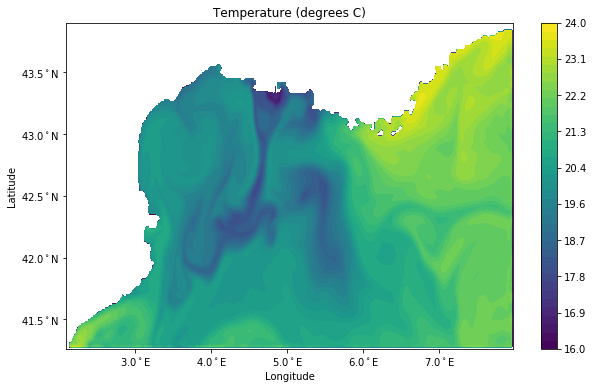

In [15]:
# plot map
plt.figure(1, figsize=(10,6))
t_map = plt.contourf(lon, lat, temp_t0, breaks)

# format lat/long labels
locs, labels = plt.xticks()
Elabels = [str(loc) + '$^\circ$E' for loc in locs]
plt.xticks(locs[1:-1], Elabels[1:-1])
locs, labels = plt.yticks()
Nlabels = [str(loc) + '$^\circ$N' for loc in locs]
plt.yticks(locs[1:-1], Nlabels[1:-1])

# figure labels
plt.colorbar(t_map, format='%.1f', ticks=bticks)
plt.title('Temperature (degrees C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()